In [1]:
%matplotlib inline
import sys

""" Uncomment the following line if you didn't install the library using pip:
"""
# sys.path.append('..')

from u8timeseries import Prophet, KthValueAgoBaseline, ExponentialSmoothing, TimeSeries
from u8timeseries.metrics import mape
from u8timeseries.backtesting import get_train_val_series, backtest_autoregressive_model

import pandas as pd
import numpy as np
from datetime import datetime
import time
import matplotlib.pyplot as plt
# from sklearn.ensemble import RandomForestRegressor

## Read data

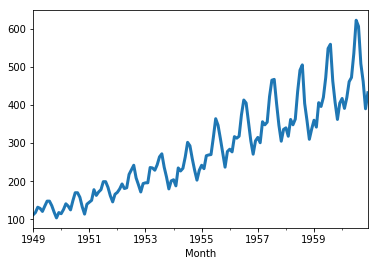

In [2]:
df = pd.read_csv('AirPassengers.csv')
series = TimeSeries.from_dataframe(df, 'Month', '#Passengers')
series.pd_series().plot(lw=3)

## Build three models and an error function

In [3]:
model_es = ExponentialSmoothing()
model_pr = Prophet()
# model_rf = SupervisedTimeSeriesModel(RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=0))
model_bl = KthValueAgoBaseline(K=1)

"""
def timeit(f):
    def wrapper(*args, **kwargs):
        tic = time.time()
        res = f(*args, **kwargs)
        tac = time.time()
        print('Time taken: %.2f s.' % (tac - tic))
        return res
    return wrapper
"""

"\ndef timeit(f):\n    def wrapper(*args, **kwargs):\n        tic = time.time()\n        res = f(*args, **kwargs)\n        tac = time.time()\n        print('Time taken: %.2f s.' % (tac - tic))\n        return res\n    return wrapper\n"

## Backtest the models on the data
Simulate 12-months ahead predictions done in the past, starting in January 1955.

In [4]:
tic = time.time()
train_val_series = get_train_val_series(series, start=pd.Timestamp('19550101'), nr_points_in_val=12)
backtest_autoregressive_model(model_es, train_val_series, mape)
tac = time.time()
print('Backtested Exponential Smoothing in %.2f s.' % (tac-tic))

"""
tic = time.time()
backtest_results_pr = model_pr.backtest(df, '#Passengers', 'Month', 'month', 
                                        datetime(1955, 1, 1), 12, error_func)
tac = time.time()
print('Backtested Prophet in %.2f s.' % (tac-tic))

tic = time.time()
backtest_results_rf = model_rf.backtest(df, '#Passengers', 'Month', 'month',
                                        datetime(1955, 1, 1), 12, error_func)
tac = time.time()
print('Backtested Random Forests in %.2f s.' % (tac-tic))

tic = time.time()
backtest_results_bl = model_bl.backtest(df, '#Passengers', 'Month', 'month',
                                        datetime(1955, 1, 1), 12, error_func)
tac = time.time()
print('Backtested Baseline in %.2f s.' % (tac-tic))
"""



            value
Month            
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
1951-01-01    145
1951-02-01    150
1951-03-01    178
1951-04-01    163
1951-05-01    172
1951-06-01    178
...           ...
1952-08-01    242
1952-09-01    209
1952-10-01    191
1952-11-01    172
1952-12-01    194
1953-01-01    196
1953-02-01    196
1953-03-01    236
1953-04-01    235
1953-05-01    229
1953-06-01    243
1953-07-01    264
1953-08-01    272
1953-09-01    237
1953-10-01    211
1953-11-01    180
1953-12-01    201
1954-01-01    204
1954-02-01    188
1954-03-01    235
1954-04-01    227
1954-05-01    234
1954-06-0

/Users/julien/unit8/u8timeseries/u8timeseries/models/autoregressive_model.py:43: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  new_dates = [self.training_series.time_index()[-1] + i for i in range(1, n+1)]



            value
Month            
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
1951-01-01    145
1951-02-01    150
1951-03-01    178
1951-04-01    163
1951-05-01    172
1951-06-01    178
...           ...
1952-09-01    209
1952-10-01    191
1952-11-01    172
1952-12-01    194
1953-01-01    196
1953-02-01    196
1953-03-01    236
1953-04-01    235
1953-05-01    229
1953-06-01    243
1953-07-01    264
1953-08-01    272
1953-09-01    237
1953-10-01    211
1953-11-01    180
1953-12-01    201
1954-01-01    204
1954-02-01    188
1954-03-01    235
1954-04-01    227
1954-05-01    234
1954-06-01    264
1954-07-0


            value
Month            
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
1951-01-01    145
1951-02-01    150
1951-03-01    178
1951-04-01    163
1951-05-01    172
1951-06-01    178
...           ...
1953-04-01    235
1953-05-01    229
1953-06-01    243
1953-07-01    264
1953-08-01    272
1953-09-01    237
1953-10-01    211
1953-11-01    180
1953-12-01    201
1954-01-01    204
1954-02-01    188
1954-03-01    235
1954-04-01    227
1954-05-01    234
1954-06-01    264
1954-07-01    302
1954-08-01    293
1954-09-01    259
1954-10-01    229
1954-11-01    203
1954-12-01    229
1955-01-01    242
1955-02-0


            value
Month            
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
1951-01-01    145
1951-02-01    150
1951-03-01    178
1951-04-01    163
1951-05-01    172
1951-06-01    178
...           ...
1953-11-01    180
1953-12-01    201
1954-01-01    204
1954-02-01    188
1954-03-01    235
1954-04-01    227
1954-05-01    234
1954-06-01    264
1954-07-01    302
1954-08-01    293
1954-09-01    259
1954-10-01    229
1954-11-01    203
1954-12-01    229
1955-01-01    242
1955-02-01    233
1955-03-01    267
1955-04-01    269
1955-05-01    270
1955-06-01    315
1955-07-01    364
1955-08-01    347
1955-09-0


            value
Month            
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
1951-01-01    145
1951-02-01    150
1951-03-01    178
1951-04-01    163
1951-05-01    172
1951-06-01    178
...           ...
1954-06-01    264
1954-07-01    302
1954-08-01    293
1954-09-01    259
1954-10-01    229
1954-11-01    203
1954-12-01    229
1955-01-01    242
1955-02-01    233
1955-03-01    267
1955-04-01    269
1955-05-01    270
1955-06-01    315
1955-07-01    364
1955-08-01    347
1955-09-01    312
1955-10-01    274
1955-11-01    237
1955-12-01    278
1956-01-01    284
1956-02-01    277
1956-03-01    317
1956-04-0


            value
Month            
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
1951-01-01    145
1951-02-01    150
1951-03-01    178
1951-04-01    163
1951-05-01    172
1951-06-01    178
...           ...
1955-01-01    242
1955-02-01    233
1955-03-01    267
1955-04-01    269
1955-05-01    270
1955-06-01    315
1955-07-01    364
1955-08-01    347
1955-09-01    312
1955-10-01    274
1955-11-01    237
1955-12-01    278
1956-01-01    284
1956-02-01    277
1956-03-01    317
1956-04-01    313
1956-05-01    318
1956-06-01    374
1956-07-01    413
1956-08-01    405
1956-09-01    355
1956-10-01    306
1956-11-0


            value
Month            
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
1951-01-01    145
1951-02-01    150
1951-03-01    178
1951-04-01    163
1951-05-01    172
1951-06-01    178
...           ...
1955-08-01    347
1955-09-01    312
1955-10-01    274
1955-11-01    237
1955-12-01    278
1956-01-01    284
1956-02-01    277
1956-03-01    317
1956-04-01    313
1956-05-01    318
1956-06-01    374
1956-07-01    413
1956-08-01    405
1956-09-01    355
1956-10-01    306
1956-11-01    271
1956-12-01    306
1957-01-01    315
1957-02-01    301
1957-03-01    356
1957-04-01    348
1957-05-01    355
1957-06-0


            value
Month            
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
1951-01-01    145
1951-02-01    150
1951-03-01    178
1951-04-01    163
1951-05-01    172
1951-06-01    178
...           ...
1956-03-01    317
1956-04-01    313
1956-05-01    318
1956-06-01    374
1956-07-01    413
1956-08-01    405
1956-09-01    355
1956-10-01    306
1956-11-01    271
1956-12-01    306
1957-01-01    315
1957-02-01    301
1957-03-01    356
1957-04-01    348
1957-05-01    355
1957-06-01    422
1957-07-01    465
1957-08-01    467
1957-09-01    404
1957-10-01    347
1957-11-01    305
1957-12-01    336
1958-01-0


            value
Month            
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
1951-01-01    145
1951-02-01    150
1951-03-01    178
1951-04-01    163
1951-05-01    172
1951-06-01    178
...           ...
1956-10-01    306
1956-11-01    271
1956-12-01    306
1957-01-01    315
1957-02-01    301
1957-03-01    356
1957-04-01    348
1957-05-01    355
1957-06-01    422
1957-07-01    465
1957-08-01    467
1957-09-01    404
1957-10-01    347
1957-11-01    305
1957-12-01    336
1958-01-01    340
1958-02-01    318
1958-03-01    362
1958-04-01    348
1958-05-01    363
1958-06-01    435
1958-07-01    491
1958-08-0


            value
Month            
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
1951-01-01    145
1951-02-01    150
1951-03-01    178
1951-04-01    163
1951-05-01    172
1951-06-01    178
...           ...
1957-05-01    355
1957-06-01    422
1957-07-01    465
1957-08-01    467
1957-09-01    404
1957-10-01    347
1957-11-01    305
1957-12-01    336
1958-01-01    340
1958-02-01    318
1958-03-01    362
1958-04-01    348
1958-05-01    363
1958-06-01    435
1958-07-01    491
1958-08-01    505
1958-09-01    404
1958-10-01    359
1958-11-01    310
1958-12-01    337
1959-01-01    360
1959-02-01    342
1959-03-0

"\ntic = time.time()\nbacktest_results_pr = model_pr.backtest(df, '#Passengers', 'Month', 'month', \n                                        datetime(1955, 1, 1), 12, error_func)\ntac = time.time()\nprint('Backtested Prophet in %.2f s.' % (tac-tic))\n\ntic = time.time()\nbacktest_results_rf = model_rf.backtest(df, '#Passengers', 'Month', 'month',\n                                        datetime(1955, 1, 1), 12, error_func)\ntac = time.time()\nprint('Backtested Random Forests in %.2f s.' % (tac-tic))\n\ntic = time.time()\nbacktest_results_bl = model_bl.backtest(df, '#Passengers', 'Month', 'month',\n                                        datetime(1955, 1, 1), 12, error_func)\ntac = time.time()\nprint('Backtested Baseline in %.2f s.' % (tac-tic))\n"

## Plot backtesting results

In [ ]:
plt.hist(backtest_results_es, bins=50, cumulative=True, histtype='step', 
         lw=2, label='Exponential Smoothing');
plt.hist(backtest_results_pr, bins=50, cumulative=True, histtype='step', 
         lw=2, label='Prophet');
plt.hist(backtest_results_rf, bins=50, cumulative=True, histtype='step', 
         lw=2, label='RF');

plt.xlabel('Mean absolute percentage error (%)')
plt.ylabel('CDF')
plt.legend(loc=4)

## Let's make an actual forecast!
Since Exponential Smoothing is better in backtests, let's use this one.

In [ ]:
model_es.fit(df, '#Passengers', 'Month', 'month')
pred_df = model_es.predict(n = 50)

plt.plot(df['Month'], df['#Passengers'], lw=2, label='Actual')
plt.plot(pred_df['Month'], pred_df['yhat'], lw=2, label='Forecast')
plt.legend()

## Example of forecasting using a supervised model and extra features
Here we show how to forecast with a supervised model, with an additional dummy (constant) feature. Note that in this case the resulting forecasts are not so interesting, as random forest simply predicts the last value because our extra feature is not informative.

In [ ]:
df_with_feature = df.copy()
df_with_feature['dummy_feature'] = [1 for _ in range(len(df))]

model_rf.fit(df_with_feature, '#Passengers', 'Month', 'month', feature_columns=['dummy_feature'])

# Predict for three years
test_dates = [datetime(1961, m, 1) for m in range(1, 13)] + \
             [datetime(1962, m, 1) for m in range(1, 13)] + \
             [datetime(1963, m, 1) for m in range(1, 13)]

test_df = pd.DataFrame({'Month': test_dates})
test_df['dummy_feature'] = [1 for _ in range(len(test_df))]

predicted_df = model_rf.predict(test_df)

plt.figure()
plt.plot(df['Month'], df['#Passengers'])
plt.plot(predicted_df['Month'], predicted_df['yhat'])